In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("../data/processed/recipes_clean.csv")

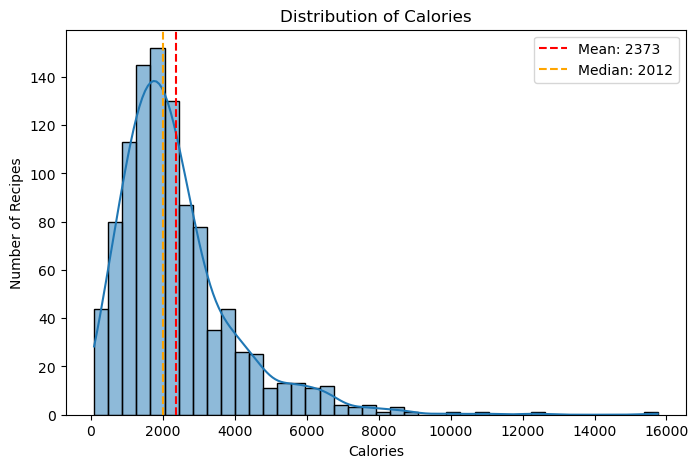

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df["calories"], bins=40, kde=True)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Number of Recipes")
plt.axvline(df["calories"].mean(), color='red', linestyle='--', label=f'Mean: {df["calories"].mean():.0f}')
plt.axvline(df["calories"].median(), color='orange', linestyle='--', label=f'Median: {df["calories"].median():.0f}')
plt.legend()
plt.show()

In [19]:
#number of ingredients per reciepe
df["num_ingredients"] = df["ingredients"].apply(lambda x: len(x.split()))
df["calories_per_ingredient"] = df["calories"] / df["num_ingredients"]
df["calories_per_ingredient"].describe()

count    1039.000000
mean       46.353582
std        45.713701
min         1.636364
25%        22.318565
50%        33.510870
75%        53.375088
max       587.809524
Name: calories_per_ingredient, dtype: float64

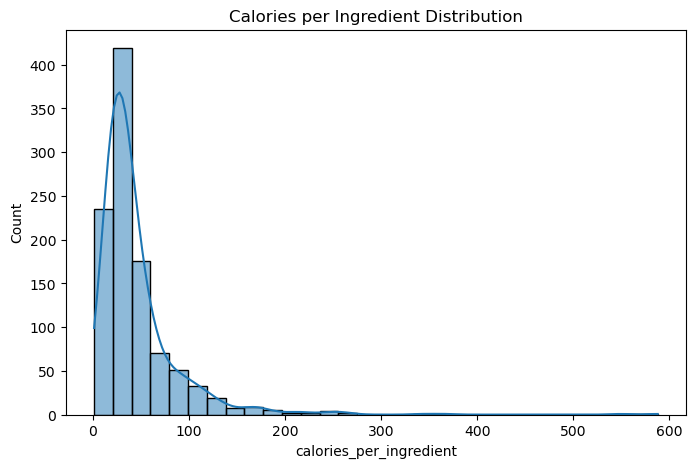

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["calories_per_ingredient"], bins=30, kde=True)
plt.title("Calories per Ingredient Distribution")
plt.show()


**Calories vs Oil / Butter Usage**

In [21]:
HIGH_CAL_ING = ["oil", "butter", "olive"]

df["has_oil_butter"] = df["ingredients"].apply(
    lambda x: any(ing in x for ing in HIGH_CAL_ING)
)
df.groupby("has_oil_butter")["calories"].mean()

has_oil_butter
False    1778.222222
True     2537.918919
Name: calories, dtype: float64

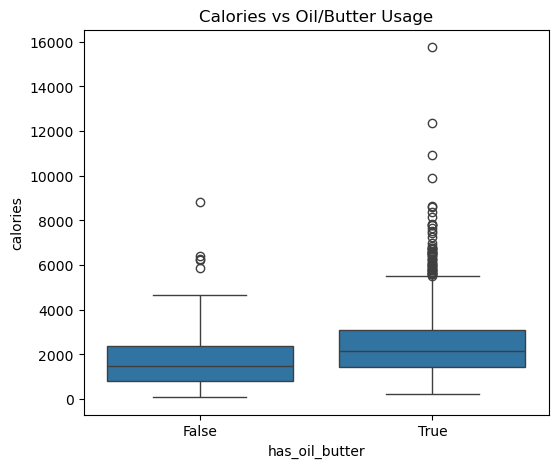

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="has_oil_butter", y="calories")
plt.title("Calories vs Oil/Butter Usage")
plt.show()

**Meat vs Vegetarian Calories**

In [23]:
MEAT = ["chicken", "beef", "pork", "lamb", "bacon", "turkey", "sausage", "ham", "fish", "salmon", "tuna"]

df["is_vegetarian"] = df["ingredients"].apply(
    lambda x: not any(meat in x for meat in MEAT)
)
df.groupby("is_vegetarian")["calories"].mean()

is_vegetarian
False    2305.969388
True     2414.259660
Name: calories, dtype: float64

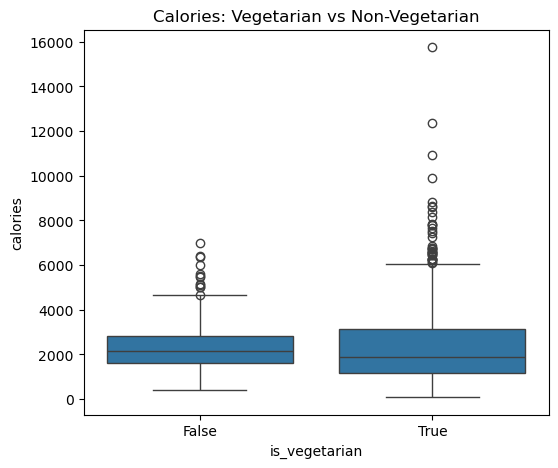

In [24]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="is_vegetarian", y="calories")
plt.title("Calories: Vegetarian vs Non-Vegetarian")
plt.show()


**Recipe difficulty based on number of steps**

In [25]:
def count_steps(instructions):
    if isinstance(instructions, list):
        return len(instructions)
    return instructions.count('.')

df["num_steps"] = df["instructions"].apply(count_steps)


In [26]:
def difficulty(steps):
    if steps <= 5:
        return "Easy"
    elif steps <= 10:
        return "Medium"
    return "Hard"

df["difficulty"] = df["num_steps"].apply(difficulty)


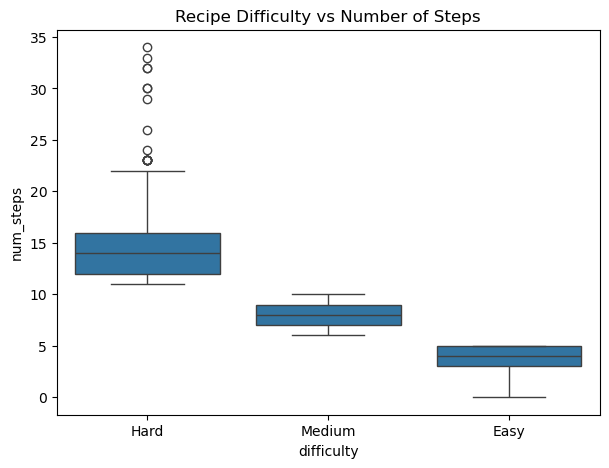

In [27]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="difficulty", y="num_steps")
plt.title("Recipe Difficulty vs Number of Steps")
plt.show()
